In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

# DeepLearning Regression

In [4]:
df = pd.read_excel("/Users/minsu/Desktop/Raisin_Dataset.xlsx")
df

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen
...,...,...,...,...,...,...,...,...
895,83248,430.077308,247.838695,0.817263,85839,0.668793,1129.072,Besni
896,87350,440.735698,259.293149,0.808629,90899,0.636476,1214.252,Besni
897,99657,431.706981,298.837323,0.721684,106264,0.741099,1292.828,Besni
898,93523,476.344094,254.176054,0.845739,97653,0.658798,1258.548,Besni


In [5]:
X = df.drop("Class", axis=1)
X.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251


In [6]:
y = df['Class']
y

0      Kecimen
1      Kecimen
2      Kecimen
3      Kecimen
4      Kecimen
        ...   
895      Besni
896      Besni
897      Besni
898      Besni
899      Besni
Name: Class, Length: 900, dtype: object

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

### 수치형 변환

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from sklearn.preprocessing import LabelEncoder

# 레이블 인코더 생성
label_encoder = LabelEncoder()

# y_train, y_test를 숫자로 변환
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

### 데이터 스케일링

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Regression Model

In [14]:
model = Sequential([
    Input(shape=(7,)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1),
])

optimizer = Adam(learning_rate=0.001)
model.compile(optimizer = optimizer, loss='mse', metrics=['mae'])

history = model.fit(X_train, y_train, epochs=15, validation_split=0.2)

Epoch 1/15


2024-09-18 22:33:52.442778: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2024-09-18 22:33:52.442803: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-09-18 22:33:52.442808: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-09-18 22:33:52.443163: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-18 22:33:52.443186: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2024-09-18 22:33:52.800881: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.3615 - mae: 0.4765 - val_loss: 0.1603 - val_mae: 0.3089
Epoch 2/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1655 - mae: 0.3058 - val_loss: 0.1296 - val_mae: 0.2734
Epoch 3/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1279 - mae: 0.2633 - val_loss: 0.1190 - val_mae: 0.2661
Epoch 4/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1436 - mae: 0.2870 - val_loss: 0.1085 - val_mae: 0.2574
Epoch 5/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1096 - mae: 0.2461 - val_loss: 0.1040 - val_mae: 0.2534
Epoch 6/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1160 - mae: 0.2504 - val_loss: 0.0969 - val_mae: 0.2398
Epoch 7/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1030 - mae: 0.2342 - val_loss: 0.0950 - val_mae: 0.2332
Epoch 8/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1041 - mae: 0.2313 - val_loss: 0.0899 - val_mae: 0.2309
Epoch 9/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0981 - mae: 0.2191 - v

In [15]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Validation MSE: {mse:.2f}")
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2:.2f}")

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Validation MSE: 0.10
R² Score: 0.58


In [16]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

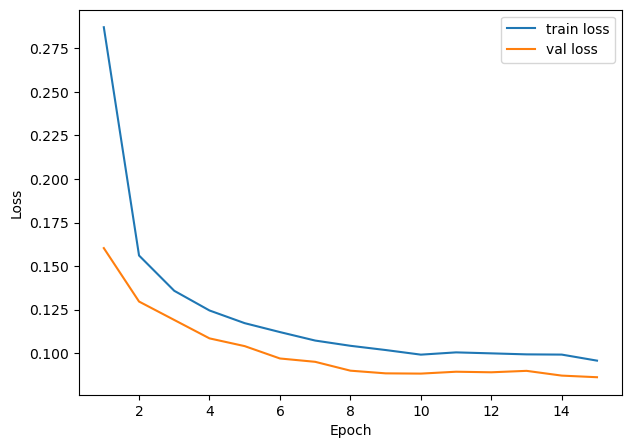

In [17]:
plt.figure(figsize=(7,5))
plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

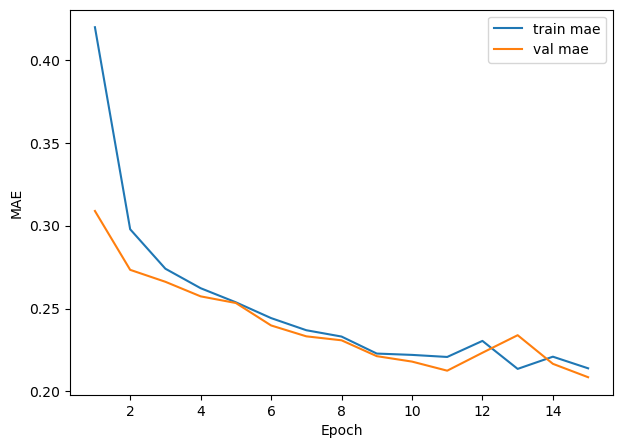

In [18]:
mae = history.history['mae']
val_mae = history.history['val_mae']

plt.figure(figsize=(7,5))
plt.plot(epochs, mae, label='train mae')
plt.plot(epochs, val_mae, label='val mae')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.show()

# Dropout 비율 조절 0.3

In [20]:
from tensorflow.keras.layers import Dropout

In [21]:
model = Sequential([
    Input(shape=(7,)),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(16, activation='relu'),
    Dropout(0.3),
    Dense(1),
])

optimizer = Adam(learning_rate=0.001)
model.compile(optimizer = optimizer, loss='mse', metrics=['mae'])

history = model.fit(X_train, y_train, epochs=15, validation_split=0.2)

Epoch 1/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.7563 - mae: 0.7182 - val_loss: 0.2275 - val_mae: 0.3680
Epoch 2/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3215 - mae: 0.4587 - val_loss: 0.1389 - val_mae: 0.3049
Epoch 3/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2836 - mae: 0.4275 - val_loss: 0.1298 - val_mae: 0.2816
Epoch 4/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2887 - mae: 0.4225 - val_loss: 0.1330 - val_mae: 0.2867
Epoch 5/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2270 - mae: 0.3758 - val_loss: 0.1324 - val_mae: 0.2924
Epoch 6/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2188 - mae: 0.3678 - val_loss: 0.1263 - val_mae: 0.2895
Epoch 7/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2006 - mae: 0.3561 - val_loss: 0.1253 - val_mae: 0.2954
Epoch 8/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2250 - mae: 0.3797 - val_loss: 0.1222 - val_mae: 0.2963
Epoch 9/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1925 - mae:

In [22]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Validation MSE: {mse:.2f}")
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2:.2f}")

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Validation MSE: 0.12
R² Score: 0.51


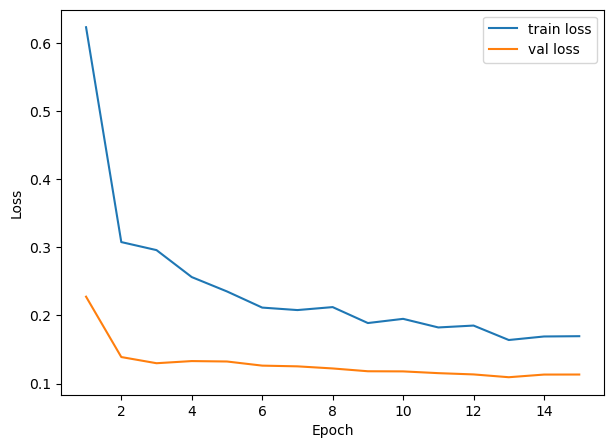

In [23]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure(figsize=(7,5))
plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

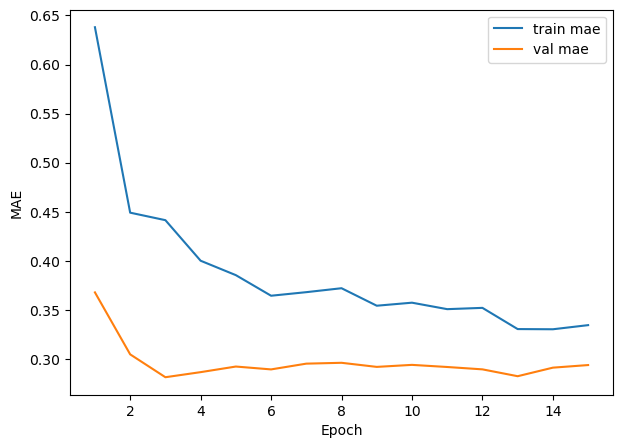

In [24]:
mae = history.history['mae']
val_mae = history.history['val_mae']

plt.figure(figsize=(7,5))
plt.plot(epochs, mae, label='train mae')
plt.plot(epochs, val_mae, label='val mae')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.show()

# Dropout 비율 조절 0.3 -> 0.2

In [26]:
model = Sequential([
    Input(shape=(7,)),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dropout(0.2),
    Dense(1),
])

optimizer = Adam(learning_rate=0.001)
model.compile(optimizer = optimizer, loss='mse', metrics=['mae'])

history = model.fit(X_train, y_train, epochs=15, validation_split=0.2)

Epoch 1/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.6139 - mae: 0.6303 - val_loss: 0.1545 - val_mae: 0.3010
Epoch 2/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2743 - mae: 0.4201 - val_loss: 0.1344 - val_mae: 0.2831
Epoch 3/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2047 - mae: 0.3614 - val_loss: 0.1283 - val_mae: 0.2835
Epoch 4/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1956 - mae: 0.3465 - val_loss: 0.1241 - val_mae: 0.2890
Epoch 5/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1842 - mae: 0.3385 - val_loss: 0.1214 - val_mae: 0.2833
Epoch 6/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1570 - mae: 0.3195 - val_loss: 0.1124 - val_mae: 0.2701
Epoch 7/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1623 - mae: 0.3236 - val_loss: 0.1098 - val_mae: 0.2684
Epoch 8/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1555 - mae: 0.3171 - val_loss: 0.1045 - val_mae: 0.2611
Epoch 9/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1938 - mae:

In [27]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Validation MSE: {mse:.2f}")
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2:.2f}")

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Validation MSE: 0.11
R² Score: 0.57


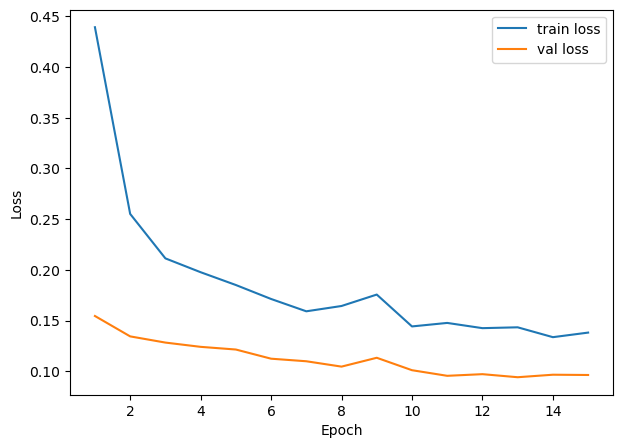

In [28]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure(figsize=(7,5))
plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

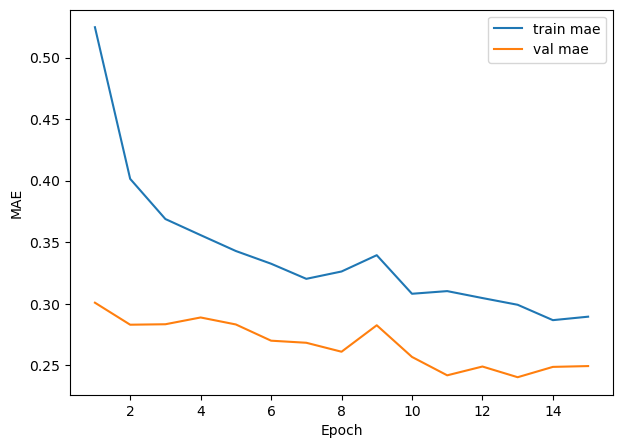

In [29]:
mae = history.history['mae']
val_mae = history.history['val_mae']

plt.figure(figsize=(7,5))
plt.plot(epochs, mae, label='train mae')
plt.plot(epochs, val_mae, label='val mae')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.show()

# L2 정규화

In [31]:
from tensorflow.keras.regularizers import l2
model = Sequential([
    Input(shape=(7,)),
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.2),
    Dense(32, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.2),
    Dense(16, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.2),
    Dense(1),
])

optimizer = Adam(learning_rate=0.001)
model.compile(optimizer = optimizer, loss='mse', metrics=['mae'])

history = model.fit(X_train, y_train, epochs=15, validation_split=0.2)

Epoch 1/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.6824 - mae: 0.6504 - val_loss: 0.2868 - val_mae: 0.3784
Epoch 2/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.3433 - mae: 0.4274 - val_loss: 0.2051 - val_mae: 0.2997
Epoch 3/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2892 - mae: 0.3787 - val_loss: 0.1984 - val_mae: 0.2803
Epoch 4/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2700 - mae: 0.3532 - val_loss: 0.1964 - val_mae: 0.2859
Epoch 5/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2706 - mae: 0.3621 - val_loss: 0.1939 - val_mae: 0.2914
Epoch 6/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2535 - mae: 0.3455 - val_loss: 0.1866 - val_mae: 0.2856
Epoch 7/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2592 - mae: 0.3545 - val_loss: 0.1853 - val_mae: 0.2908
Epoch 8/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2236 - mae: 0.3242 - val_loss: 0.1727 - val_mae: 0.2663
Epoch 9/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2458 - mae:

In [32]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Validation MSE: {mse:.2f}")
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2:.2f}")

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Validation MSE: 0.11
R² Score: 0.57


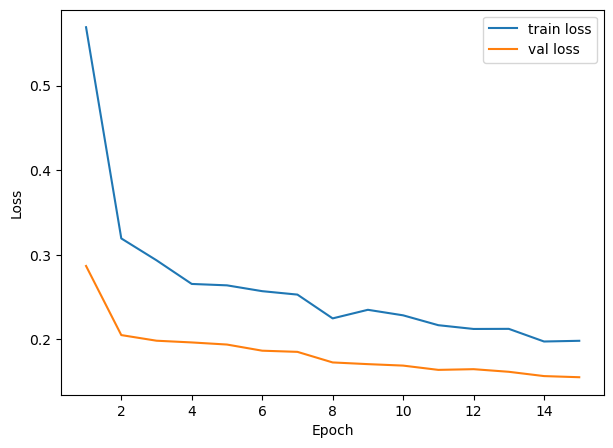

In [33]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure(figsize=(7,5))
plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

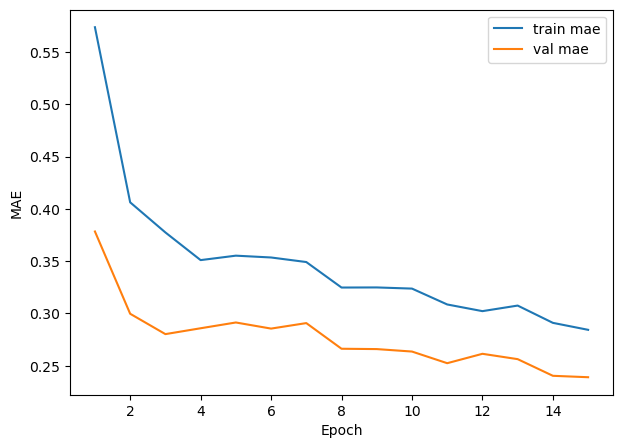

In [34]:
mae = history.history['mae']
val_mae = history.history['val_mae']

plt.figure(figsize=(7,5))
plt.plot(epochs, mae, label='train mae')
plt.plot(epochs, val_mae, label='val mae')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.show()

# DenseLayer(32) 추가

In [36]:
from tensorflow.keras.regularizers import l2
model = Sequential([
    Input(shape=(7,)),
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.2),
    Dense(32, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.2),
    Dense(32, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.2),
    Dense(16, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.2),
    Dense(1),
])

optimizer = Adam(learning_rate=0.001)
model.compile(optimizer = optimizer, loss='mse', metrics=['mae'])

history = model.fit(X_train, y_train, epochs=15, validation_split=0.2)

Epoch 1/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 1.0688 - mae: 0.7538 - val_loss: 0.5075 - val_mae: 0.5094
Epoch 2/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.5925 - mae: 0.5893 - val_loss: 0.3493 - val_mae: 0.4304
Epoch 3/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.4132 - mae: 0.4742 - val_loss: 0.2651 - val_mae: 0.3520
Epoch 4/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.3306 - mae: 0.3987 - val_loss: 0.2413 - val_mae: 0.3139
Epoch 5/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.3173 - mae: 0.3763 - val_loss: 0.2391 - val_mae: 0.3178
Epoch 6/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.3020 - mae: 0.3671 - val_loss: 0.2331 - val_mae: 0.3135
Epoch 7/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.2882 - mae: 0.3604 - val_loss: 0.2265 - val_mae: 0.3081
Epoch 8/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.2851 - mae: 0.3536 - val_loss: 0.2216 - val_mae: 0.3029
Epoch 9/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.247

In [37]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Validation MSE: {mse:.2f}")
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2:.2f}")

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Validation MSE: 0.11
R² Score: 0.54


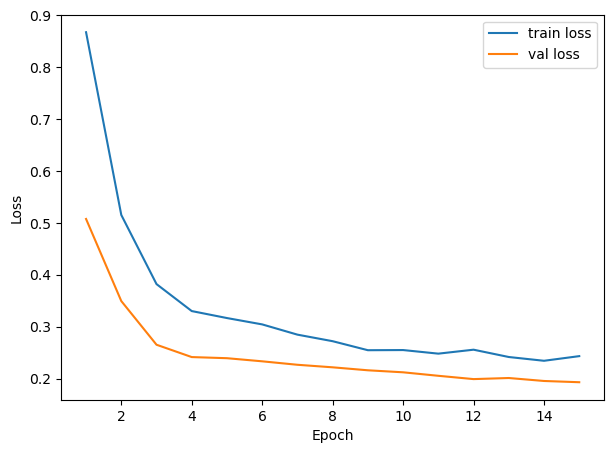

In [38]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure(figsize=(7,5))
plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

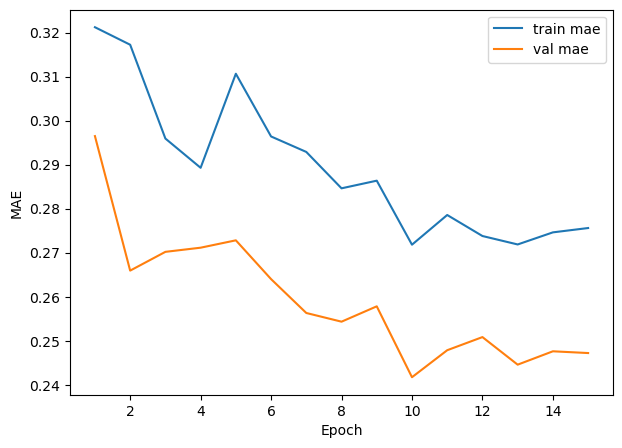

In [103]:
mae = history.history['mae']
val_mae = history.history['val_mae']

plt.figure(figsize=(7,5))
plt.plot(epochs, mae, label='train mae')
plt.plot(epochs, val_mae, label='val mae')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.show()

# Dense(32), 정규화 제거, Epochs 15 -> 30 증가

In [105]:
model = Sequential([
    Input(shape=(7,)),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dropout(0.2),
    Dense(1),
])

optimizer = Adam(learning_rate=0.001)
model.compile(optimizer = optimizer, loss='mse', metrics=['mae'])

history = model.fit(X_train, y_train, epochs=30, validation_split=0.2)

Epoch 1/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.6153 - mae: 0.6349 - val_loss: 0.2662 - val_mae: 0.4071
Epoch 2/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.3016 - mae: 0.4256 - val_loss: 0.1543 - val_mae: 0.3168
Epoch 3/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2140 - mae: 0.3529 - val_loss: 0.1330 - val_mae: 0.2867
Epoch 4/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2232 - mae: 0.3649 - val_loss: 0.1348 - val_mae: 0.2916
Epoch 5/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2197 - mae: 0.3625 - val_loss: 0.1328 - val_mae: 0.2960
Epoch 6/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2021 - mae: 0.3505 - val_loss: 0.1240 - val_mae: 0.2854
Epoch 7/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1905 - mae: 0.3419 - val_loss: 0.1181 - val_mae: 0.2779
Epoch 8/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1853 - mae: 0.3320 - val_loss: 0.1188 - val_mae: 0.2842
Epoch 9/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2049 - mae:

In [107]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Validation MSE: {mse:.2f}")
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2:.2f}")

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Validation MSE: 0.10
R² Score: 0.58


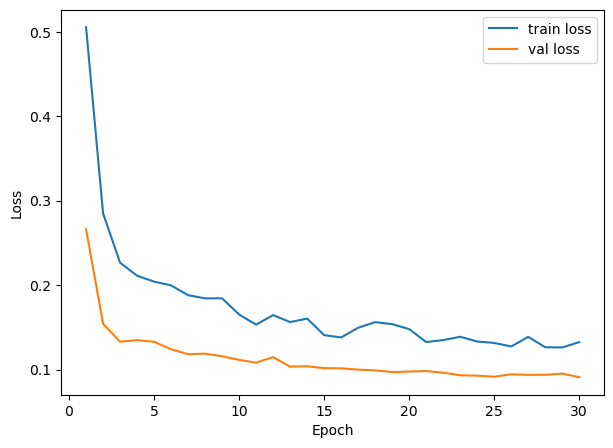

In [109]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure(figsize=(7,5))
plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

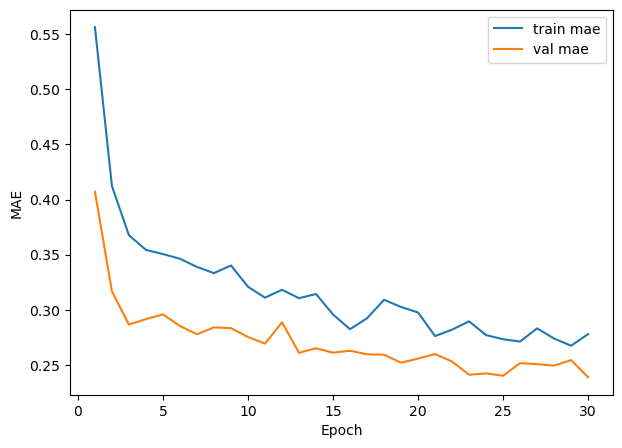

In [111]:
mae = history.history['mae']
val_mae = history.history['val_mae']

plt.figure(figsize=(7,5))
plt.plot(epochs, mae, label='train mae')
plt.plot(epochs, val_mae, label='val mae')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.show()